In [2]:
import tensorflow as tf

## Convert Images in directory into Dataset
we can use `tf.keras.preprocessing.image_dataset_from_directory` to convert the data into dataset so we can train the models out of the box

In [2]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/input/indian-medicinal-leaves-dataset/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset",
    shuffle=True,
    batch_size=32,
    image_size=(299, 299),
)

labels = dataset.class_names
labels

Found 6900 files belonging to 80 classes.


['Aloevera',
 'Amla',
 'Amruthaballi',
 'Arali',
 'Astma_weed',
 'Badipala',
 'Balloon_Vine',
 'Bamboo',
 'Beans',
 'Betel',
 'Bhrami',
 'Bringaraja',
 'Caricature',
 'Castor',
 'Catharanthus',
 'Chakte',
 'Chilly',
 'Citron lime (herelikai)',
 'Coffee',
 'Common rue(naagdalli)',
 'Coriender',
 'Curry',
 'Doddpathre',
 'Drumstick',
 'Ekka',
 'Eucalyptus',
 'Ganigale',
 'Ganike',
 'Gasagase',
 'Ginger',
 'Globe Amarnath',
 'Guava',
 'Henna',
 'Hibiscus',
 'Honge',
 'Insulin',
 'Jackfruit',
 'Jasmine',
 'Kambajala',
 'Kasambruga',
 'Kohlrabi',
 'Lantana',
 'Lemon',
 'Lemongrass',
 'Malabar_Nut',
 'Malabar_Spinach',
 'Mango',
 'Marigold',
 'Mint',
 'Neem',
 'Nelavembu',
 'Nerale',
 'Nooni',
 'Onion',
 'Padri',
 'Palak(Spinach)',
 'Papaya',
 'Parijatha',
 'Pea',
 'Pepper',
 'Pomoegranate',
 'Pumpkin',
 'Raddish',
 'Rose',
 'Sampige',
 'Sapota',
 'Seethaashoka',
 'Seethapala',
 'Spinach1',
 'Tamarind',
 'Taro',
 'Tecoma',
 'Thumbe',
 'Tomato',
 'Tulsi',
 'Turmeric',
 'ashoka',
 'camphor',
 

In [3]:
import numpy as np

for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    break

(32, 299, 299, 3)
[65 37 78 55 17  5 71 54 36 48 74 57 43 42 20 51 35 39  0 70 16 45 42 57
 10 19 14 22  0 30 69 69]


In [4]:
# train test split
train_size = int(0.8 * len(dataset))
test_size = int(0.2 * len(dataset))
train_size, test_size

(172, 43)

## Train, Test, Validate
partition the data into train test and validation datasets

In [5]:
def get_dataset_partisions_tf(ds, train_split=0.8, test_split=0.2, shuffle=True, shuffle_size=10000):
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * len(ds))
    test_size = int(test_split * len(ds))
    train_ds = ds.take(train_size)
    test_ds = ds.skip(train_size)
    val_ds = test_ds.skip(test_size)
    test_ds = test_ds.take(test_size)
    return train_ds, test_ds, val_ds

In [6]:
train_ds, test_ds, val_ds = get_dataset_partisions_tf(dataset)
len(train_ds), len(test_ds), len(val_ds)

(172, 43, 1)

## Resize and Normalize
- Xception models takes the image input as 299x299 pixels so converting into the trainable format is necessary
- The Images are to be normalized before to train accurately and efficiently

In [7]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(299, 299),
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
])

### Download the Xception model predefined weights from tensorflow into your working environment

In [8]:
# train using Xception
base_model = tf.keras.applications.InceptionV3(
    weights='imagenet',
    input_shape=(299, 299, 3),
    include_top=False,
    pooling='avg',
    classifier_activation='softmax',
    classes=len(labels)
)

87910968/87910968 [==============================] - 0s 0us/step


In [9]:
base_model.trainable = False

inputs = tf.keras.Input(shape=(299, 299, 3))
x = resize_and_rescale(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(len(labels), activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

history = model.fit(
    train_ds,
    validation_data=val_ds,
    batch_size=32,
    epochs=20
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 299, 299, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 80)                10320     
                                                                 
Total params: 22,075,376
Trainable params: 272,592
Non-traina

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - ETA: 0s - loss: 3.6631 - accuracy: 0.1641

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - 485s 1s/step - loss: 3.6631 - accuracy: 0.1641 - val_loss: 2.7414 - val_accuracy: 0.3750
Epoch 2/20


Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - ETA: 0s - loss: 2.3995 - accuracy: 0.4004

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - 466s 1s/step - loss: 2.3995 - accuracy: 0.4004 - val_loss: 1.7994 - val_accuracy: 0.6562
Epoch 3/20


Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - ETA: 0s - loss: 1.7634 - accuracy: 0.5410

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - 467s 1s/step - loss: 1.7634 - accuracy: 0.5410 - val_loss: 1.3904 - val_accuracy: 0.6250
Epoch 4/20


Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - ETA: 0s - loss: 1.4188 - accuracy: 0.6187

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - 470s 1s/step - loss: 1.4188 - accuracy: 0.6187 - val_loss: 0.9364 - val_accuracy: 0.8438
Epoch 5/20


Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - ETA: 0s - loss: 1.2040 - accuracy: 0.6666

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - 469s 1s/step - loss: 1.2040 - accuracy: 0.6666 - val_loss: 0.8163 - val_accuracy: 0.8438
Epoch 6/20


Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - ETA: 0s - loss: 1.0222 - accuracy: 0.7201

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - 465s 1s/step - loss: 1.0222 - accuracy: 0.7201 - val_loss: 0.5364 - val_accuracy: 0.9375
Epoch 7/20


Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - ETA: 0s - loss: 0.9022 - accuracy: 0.7509

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - 502s 2s/step - loss: 0.9022 - accuracy: 0.7509 - val_loss: 0.6315 - val_accuracy: 0.8750
Epoch 8/20


Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - ETA: 0s - loss: 0.8418 - accuracy: 0.7673

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - 470s 1s/step - loss: 0.8418 - accuracy: 0.7673 - val_loss: 0.4346 - val_accuracy: 0.8750
Epoch 9/20


Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - ETA: 0s - loss: 0.7431 - accuracy: 0.7887

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - 460s 1s/step - loss: 0.7431 - accuracy: 0.7887 - val_loss: 0.3674 - val_accuracy: 0.8750
Epoch 10/20


Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - ETA: 0s - loss: 0.6800 - accuracy: 0.8097

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - 468s 1s/step - loss: 0.6800 - accuracy: 0.8097 - val_loss: 0.4037 - val_accuracy: 0.9375
Epoch 11/20


Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - ETA: 0s - loss: 0.6079 - accuracy: 0.8268

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - 467s 1s/step - loss: 0.6079 - accuracy: 0.8268 - val_loss: 0.3292 - val_accuracy: 0.9062
Epoch 12/20


Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - ETA: 0s - loss: 0.5747 - accuracy: 0.8381

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - 465s 1s/step - loss: 0.5747 - accuracy: 0.8381 - val_loss: 0.2994 - val_accuracy: 0.9375
Epoch 13/20


Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - ETA: 0s - loss: 0.5228 - accuracy: 0.8507

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - 459s 1s/step - loss: 0.5228 - accuracy: 0.8507 - val_loss: 0.1432 - val_accuracy: 0.9688
Epoch 14/20


Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - ETA: 0s - loss: 0.5086 - accuracy: 0.8509

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - 466s 1s/step - loss: 0.5086 - accuracy: 0.8509 - val_loss: 0.2949 - val_accuracy: 0.8750
Epoch 15/20


Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - ETA: 0s - loss: 0.4408 - accuracy: 0.8762

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - 467s 1s/step - loss: 0.4408 - accuracy: 0.8762 - val_loss: 0.1426 - val_accuracy: 0.9688
Epoch 16/20


Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - ETA: 0s - loss: 0.4144 - accuracy: 0.8818

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - 467s 1s/step - loss: 0.4144 - accuracy: 0.8818 - val_loss: 0.1489 - val_accuracy: 1.0000
Epoch 17/20


Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - ETA: 0s - loss: 0.3924 - accuracy: 0.8880

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - 460s 1s/step - loss: 0.3924 - accuracy: 0.8880 - val_loss: 0.0580 - val_accuracy: 1.0000
Epoch 18/20


Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - ETA: 0s - loss: 0.3708 - accuracy: 0.8948

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - 465s 1s/step - loss: 0.3708 - accuracy: 0.8948 - val_loss: 0.0849 - val_accuracy: 1.0000
Epoch 19/20


Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - ETA: 0s - loss: 0.3708 - accuracy: 0.8902

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - 463s 1s/step - loss: 0.3708 - accuracy: 0.8902 - val_loss: 0.0562 - val_accuracy: 1.0000
Epoch 20/20


Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - ETA: 0s - loss: 0.3229 - accuracy: 0.9048

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


172/172 [==============================] - 469s 1s/step - loss: 0.3229 - accuracy: 0.9048 - val_loss: 0.0873 - val_accuracy: 0.9688


In [10]:
model.evaluate(test_ds)

Corrupt JPEG data: 445 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


43/43 [==============================] - 233s 76ms/step - loss: 0.1245 - accuracy: 0.9775


[0.12449967861175537, 0.9774709343910217]

In [11]:
# predict with new images
import numpy as np

img = tf.keras.preprocessing.image.load_img(
    '/kaggle/input/test-medicinal-leaves/alo.jpg', target_size=(299, 299)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch


predictions = model.predict(img_array)
score = tf.nn.sigmoid(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 2s 2s/step
This image most likely belongs to Aloevera with a 65.56 percent confidence.


In [12]:
# predict with new images
import numpy as np

img = tf.keras.preprocessing.image.load_img(
    '/kaggle/input/test-medicinal-leaves/bamboo.jpeg', target_size=(299, 299)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch
predictions = model.predict(img_array)
score = tf.nn.sigmoid(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 27ms/step
This image most likely belongs to Bamboo with a 69.30 percent confidence.


In [13]:
import numpy as np

img = tf.keras.preprocessing.image.load_img(
    '/kaggle/input/test-medicinal-leaves/betel-leaf-1024x1024.jpg', target_size=(299, 299)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch
predictions = model.predict(img_array)
score = tf.nn.sigmoid(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 27ms/step
This image most likely belongs to Betel with a 65.01 percent confidence.


In [14]:
import numpy as np

img = tf.keras.preprocessing.image.load_img(
    '/kaggle/input/test-medicinal-leaves/bamboo.jpeg', target_size=(299, 299)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch
predictions = model.predict(img_array)
score = tf.nn.sigmoid(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 26ms/step
This image most likely belongs to Bamboo with a 69.30 percent confidence.


In [15]:
import numpy as np

img = tf.keras.preprocessing.image.load_img(
    '/kaggle/input/test-medicinal-leaves/doddapatre.jpg', target_size=(299, 299)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch
predictions = model.predict(img_array)
score = tf.nn.sigmoid(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 25ms/step
This image most likely belongs to Doddpathre with a 69.35 percent confidence.


In [16]:
import numpy as np

img = tf.keras.preprocessing.image.load_img(
    '/kaggle/input/test-medicinal-leaves/tulsi-leaves-t-cut-500x500.jpg.webp', target_size=(299, 299)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch
predictions = model.predict(img_array)
score = tf.nn.sigmoid(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 25ms/step
This image most likely belongs to Tulsi with a 64.03 percent confidence.


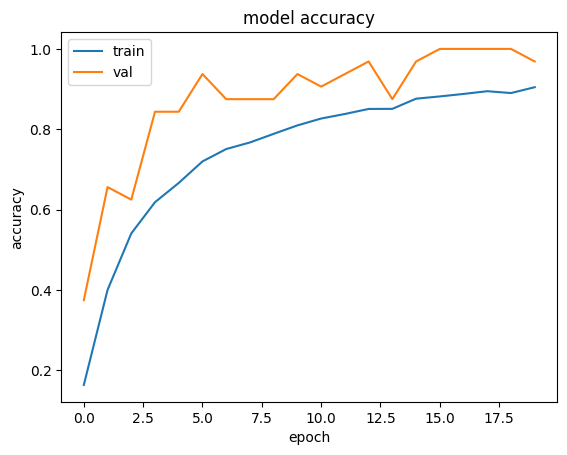

In [17]:
# plot accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [18]:
model.save('model_avg_20_inception.h5')